In [1]:
#importing library
import pandas as pd
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np
from google.colab import files

In [2]:
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#importing input file
data=pd.read_excel('/content/drive/MyDrive/NLP Case Study/Input.xlsx')[['URL_ID','URL']]

In [6]:
data=data.iloc[0:150]

In [7]:
data

,URL_ID,URL
0,37.0,https://insights.blackcoffer.com/ai-in-healthc...
1,38.0,https://insights.blackcoffer.com/what-if-the-c...
2,39.0,https://insights.blackcoffer.com/what-jobs-wil...
3,40.0,https://insights.blackcoffer.com/will-machine-...
4,41.0,https://insights.blackcoffer.com/will-ai-repla...
...,...,...
109,146.0,https://insights.blackcoffer.com/blockchain-fo...
110,147.0,https://insights.blackcoffer.com/the-future-of...
111,148.0,https://insights.blackcoffer.com/big-data-anal...
112,149.0,https://insights.blackcoffer.com/business-anal...


In [8]:
data.drop('URL_ID',axis=1,inplace=True)

In [9]:
data

,URL
0,https://insights.blackcoffer.com/ai-in-healthc...
1,https://insights.blackcoffer.com/what-if-the-c...
2,https://insights.blackcoffer.com/what-jobs-wil...
3,https://insights.blackcoffer.com/will-machine-...
4,https://insights.blackcoffer.com/will-ai-repla...
...,...
109,https://insights.blackcoffer.com/blockchain-fo...
110,https://insights.blackcoffer.com/the-future-of...
111,https://insights.blackcoffer.com/big-data-anal...
112,https://insights.blackcoffer.com/business-anal...


# Data extraction

In [10]:
url="""https://insights.blackcoffer.com/how-is-login-logout-time-tracking-for-employees-in-office-done-by-ai/"""

In [11]:
headers = {"User-Agent": "google chrome"}
page = requests.get(url, headers=headers)
soup = BeautifulSoup(page.content, 'html.parser')

In [12]:
soup=BeautifulSoup(page.content, 'html.parser')

In [13]:
title=soup.find('h1',class_="entry-title")
title=title.text.replace('\n'," ")
title

'How is Login Logout Time Tracking for Employees in Office done by AI?'

In [14]:
content=soup.findAll(attrs={'class':'td-post-content'})
content=content[0].text.replace('\n'," ")
content

' When people hear AI they often think about sentient robots and magic boxes. AI today is much more mundane and simple—but that doesn’t mean it’s not powerful. Another misconception is that high-profile research projects can be applied directly to any business situation. AI done right can create an extreme return on investments (ROIs)—for instance through automation or precise prediction. But it does take thought, time, and proper implementation. We have seen that success and value generated by AI projects are increased when there is a grounded understanding and expectation of what the technology can deliver from the C-suite down. “Artificial Intelligence (AI) is a science and a set of computational technologies that are inspired by—but typically operate quite differently from—the ways people use their nervous systems and bodies to sense, learn, reason and take action.”3 Lately there has been a big rise in the day-to-day use of machines powered by AI. These machines are wired using cro

In [17]:
#Punctuation
import string
content = content.translate(str.maketrans('', '', string.punctuation)) 
content

' When people hear AI they often think about sentient robots and magic boxes AI today is much more mundane and simple—but that doesn’t mean it’s not powerful Another misconception is that highprofile research projects can be applied directly to any business situation AI done right can create an extreme return on investments ROIs—for instance through automation or precise prediction But it does take thought time and proper implementation We have seen that success and value generated by AI projects are increased when there is a grounded understanding and expectation of what the technology can deliver from the Csuite down “Artificial Intelligence AI is a science and a set of computational technologies that are inspired by—but typically operate quite differently from—the ways people use their nervous systems and bodies to sense learn reason and take action”3 Lately there has been a big rise in the daytoday use of machines powered by AI These machines are wired using crossdisciplinary appro

In [18]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(content)
print(text_tokens[0:50])

['When', 'people', 'hear', 'AI', 'they', 'often', 'think', 'about', 'sentient', 'robots', 'and', 'magic', 'boxes', 'AI', 'today', 'is', 'much', 'more', 'mundane', 'and', 'simple—but', 'that', 'doesn', '’', 't', 'mean', 'it', '’', 's', 'not', 'powerful', 'Another', 'misconception', 'is', 'that', 'highprofile', 'research', 'projects', 'can', 'be', 'applied', 'directly', 'to', 'any', 'business', 'situation', 'AI', 'done', 'right', 'can']


In [19]:
len(text_tokens)

728

In [20]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['When', 'people', 'hear', 'AI', 'often', 'think', 'sentient', 'robots', 'magic', 'boxes', 'AI', 'today', 'much', 'mundane', 'simple—but', '’', 'mean', '’', 'powerful', 'Another', 'misconception', 'highprofile', 'research', 'projects', 'applied', 'directly', 'business', 'situation', 'AI', 'done', 'right', 'create', 'extreme', 'return', 'investments', 'ROIs—for', 'instance', 'automation', 'precise', 'prediction']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
len(no_stop_tokens)

456

In [23]:
#importing master Dictionary
#Positive words
with open("/content/drive/MyDrive/NLP Case Study/positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")  
    poswords = poswords[5:]

In [24]:
pos_count = " ".join ([w for w in no_stop_tokens if w in poswords])
pos_count=pos_count.split(" ")

In [25]:
#Positive Score
Positive_score=len(pos_count)
print(Positive_score)

16


In [26]:
#Negative words
with open("/content/drive/MyDrive/NLP Case Study/negative-words.txt","r",encoding = "ISO-8859-1") as neg:
    negwords = neg.read().split("\n")
    
negwords = negwords[36:]

In [27]:
neg_count = " ".join ([w for w in no_stop_tokens if w in negwords])
neg_count=neg_count.split(" ")

In [28]:
Negative_score=len(neg_count)
print(Negative_score)

9


In [29]:
filter_content = ' '.join(no_stop_tokens)

In [33]:
data=[[url,title,content,filter_content,Positive_score,Negative_score]]
# data=pd.DataFrame(data,columns=["url","title","content","filter_content","Positive_Score","Negative_Score"])

In [35]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(data):
    sentiment = TextBlob(data["content"]).sentiment
    return pd.Series([sentiment.polarity,sentiment.subjectivity ])

# Adding Subjectivity & Polarity
data[["polarity", "subjectivity"]] = data.apply(sentiment_analysis, axis=1)

data

,url,title,content,filter_content,Positive_Score,Negative_Score,polarity,subjectivity
0,https://insights.blackcoffer.com/how-is-login-...,How is Login Logout Time Tracking for Employee...,When people hear AI they often think about se...,When people hear AI often think sentient robot...,16,9,0.14304,0.478514


In [37]:
#AVG SENTENCE LENGTH
import regex as re
AVG_SENTENCE_LENGTH = len(content.replace(' ',''))/len(re.split(r'[?!.]', content))
print('Word average =', AVG_SENTENCE_LENGTH)

Word average = 3673.0


In [46]:
#word count
Word_Count=len(content)
print(Word_Count)

4386


In [41]:
#complex word count
def syllable_count(word):
    count = 0
    vowels = "AEIOUYaeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)): 
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
            if word.endswith("es"or "ed"):
                count -= 1
    if count == 0:
        count += 1
    return count



COMPLEX_WORDS=syllable_count(content)
print(COMPLEX_WORDS)

1279


In [48]:
pcw=(COMPLEX_WORDS/Word_Count)*100
print(pcw)

29.1609667122663


In [42]:
Fog_Index = 0.4 * (AVG_SENTENCE_LENGTH + COMPLEX_WORDS)
print('fog index= ',Fog_Index )

fog index=  1980.8000000000002


In [43]:
AVG_NUMBER_OF_WORDS_PER_SENTENCE = [len(l.split()) for l in re.split(r'[?!.]', content) if l.strip()]
AVG_NUMBER_OF_WORDS_PER_SENTENCE=print(sum(AVG_NUMBER_OF_WORDS_PER_SENTENCE)/len(AVG_NUMBER_OF_WORDS_PER_SENTENCE))

712.0


In [49]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [50]:
#ersonal pronouns
def ProperNounExtractor(text):
    count = 0
    sentences = nltk.sent_tokenize(text)
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        tagged = nltk.pos_tag(words)
        for (word, tag) in tagged:
            if tag == 'PRP': # If the word is a proper noun
                count = count + 1 
        
    return(count)         
                


# Calling the ProperNounExtractor function to extract all the proper nouns from the given text. 
Personal_Pronouns=ProperNounExtractor(content)  


In [51]:
#average word length
Average_Word_Length=len(content.replace(' ',''))/len(content.split())
print(Average_Word_Length)

5.158707865168539


In [52]:

word=content.replace(' ','')
syllable_count=0
for w in word:
      if(w=='a' or w=='e' or w=='i' or w=='o' or w=='y' or w=='u' or w=='A' or w=='E' or w=='I' or w=='O' or w=='U' or w=='Y'):
            syllable_count=syllable_count+1
print("The AVG number of syllables in the word is: ")
print(syllable_count/len(content.split()))

The AVG number of syllables in the word is: 
2.109550561797753


In [53]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

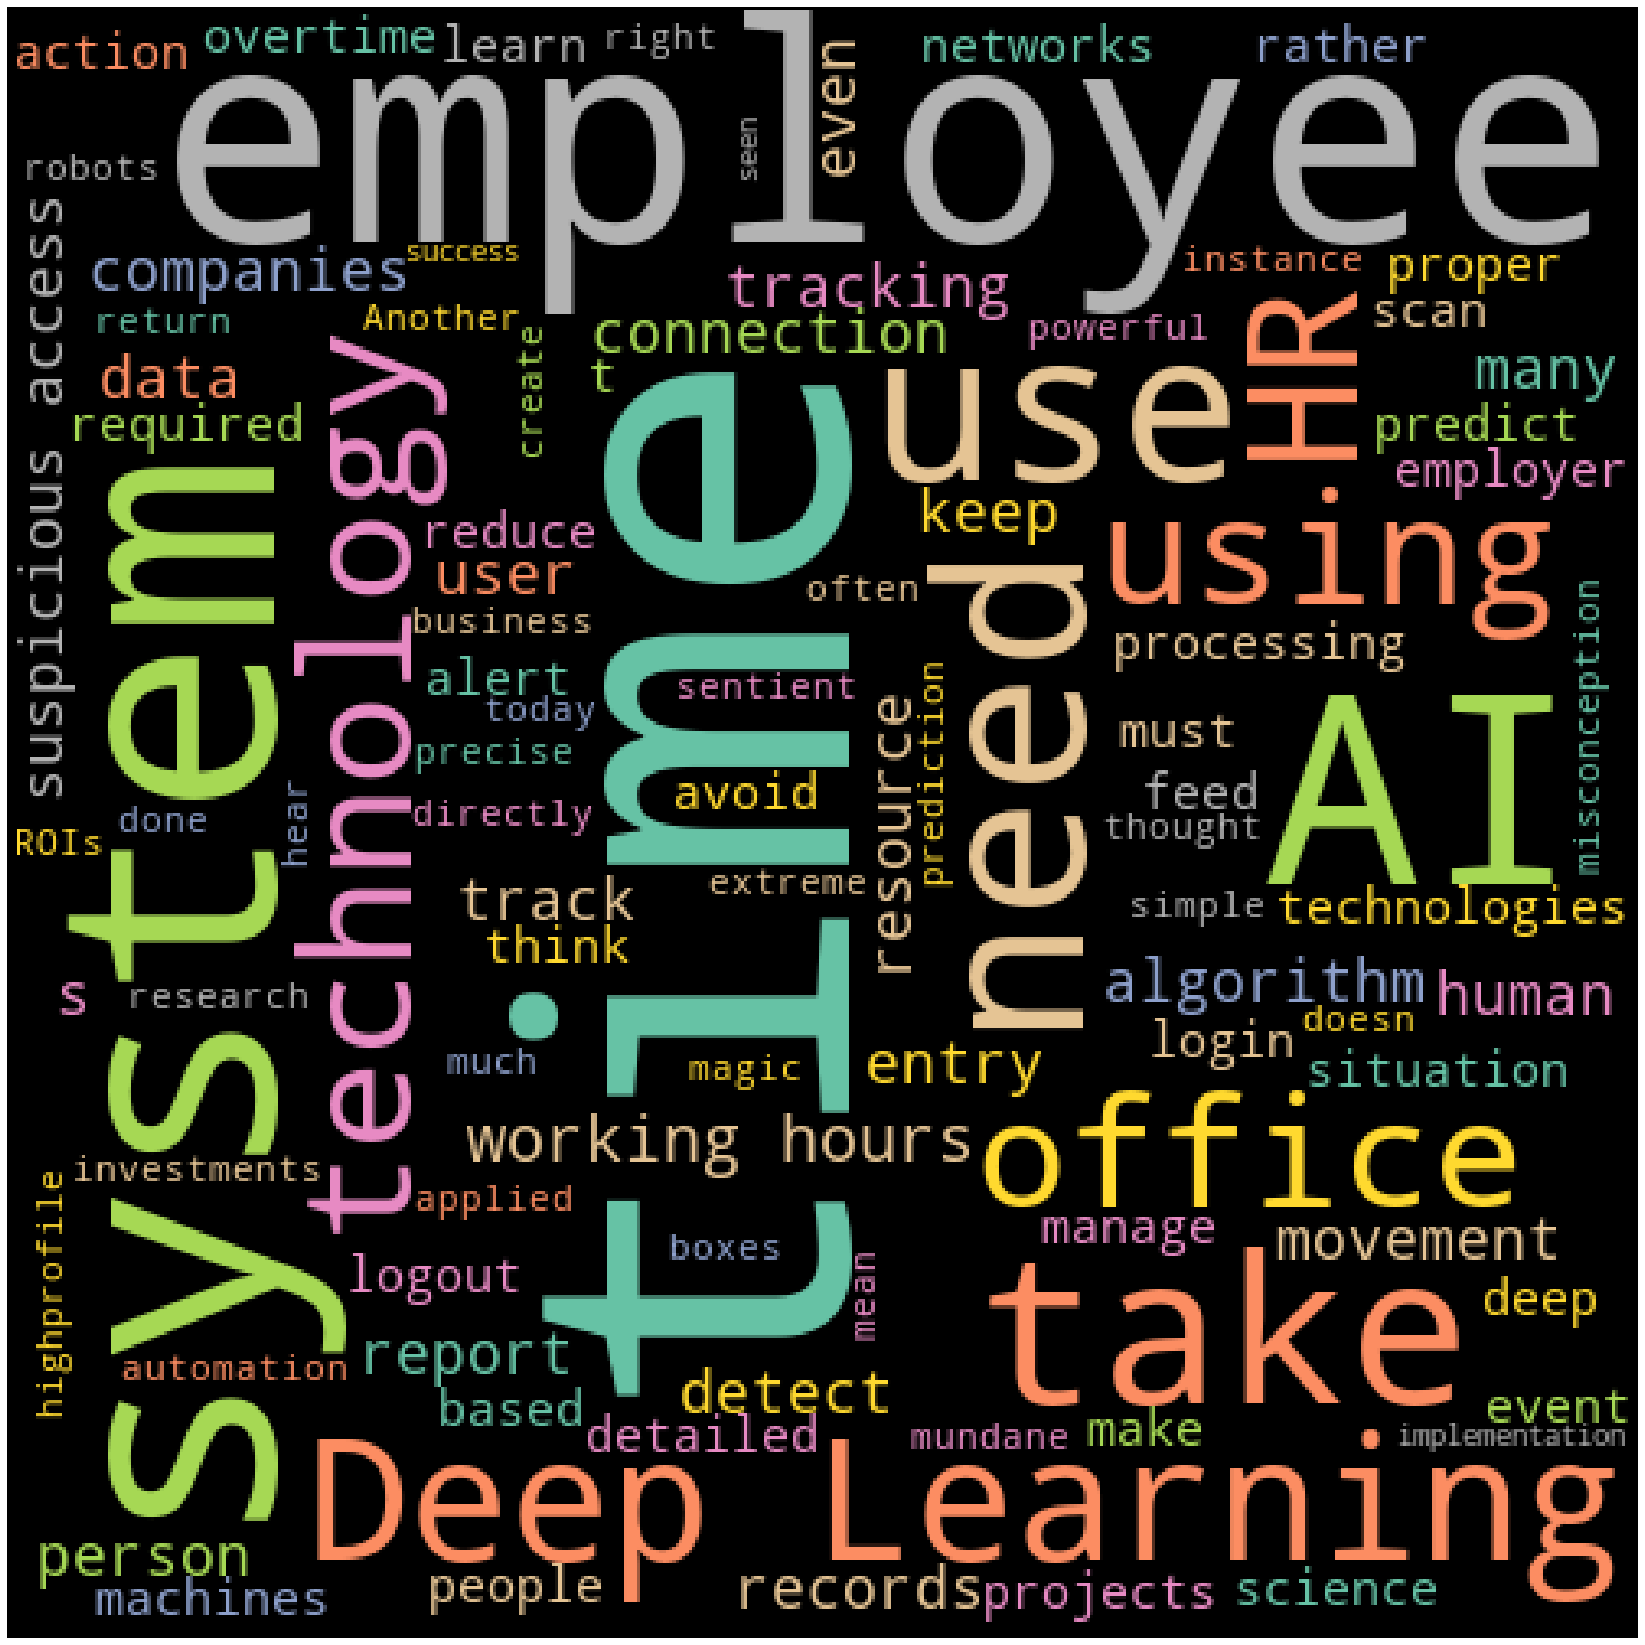

In [54]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 500, height = 500, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(content)
# Plot
plot_cloud(wordcloud)

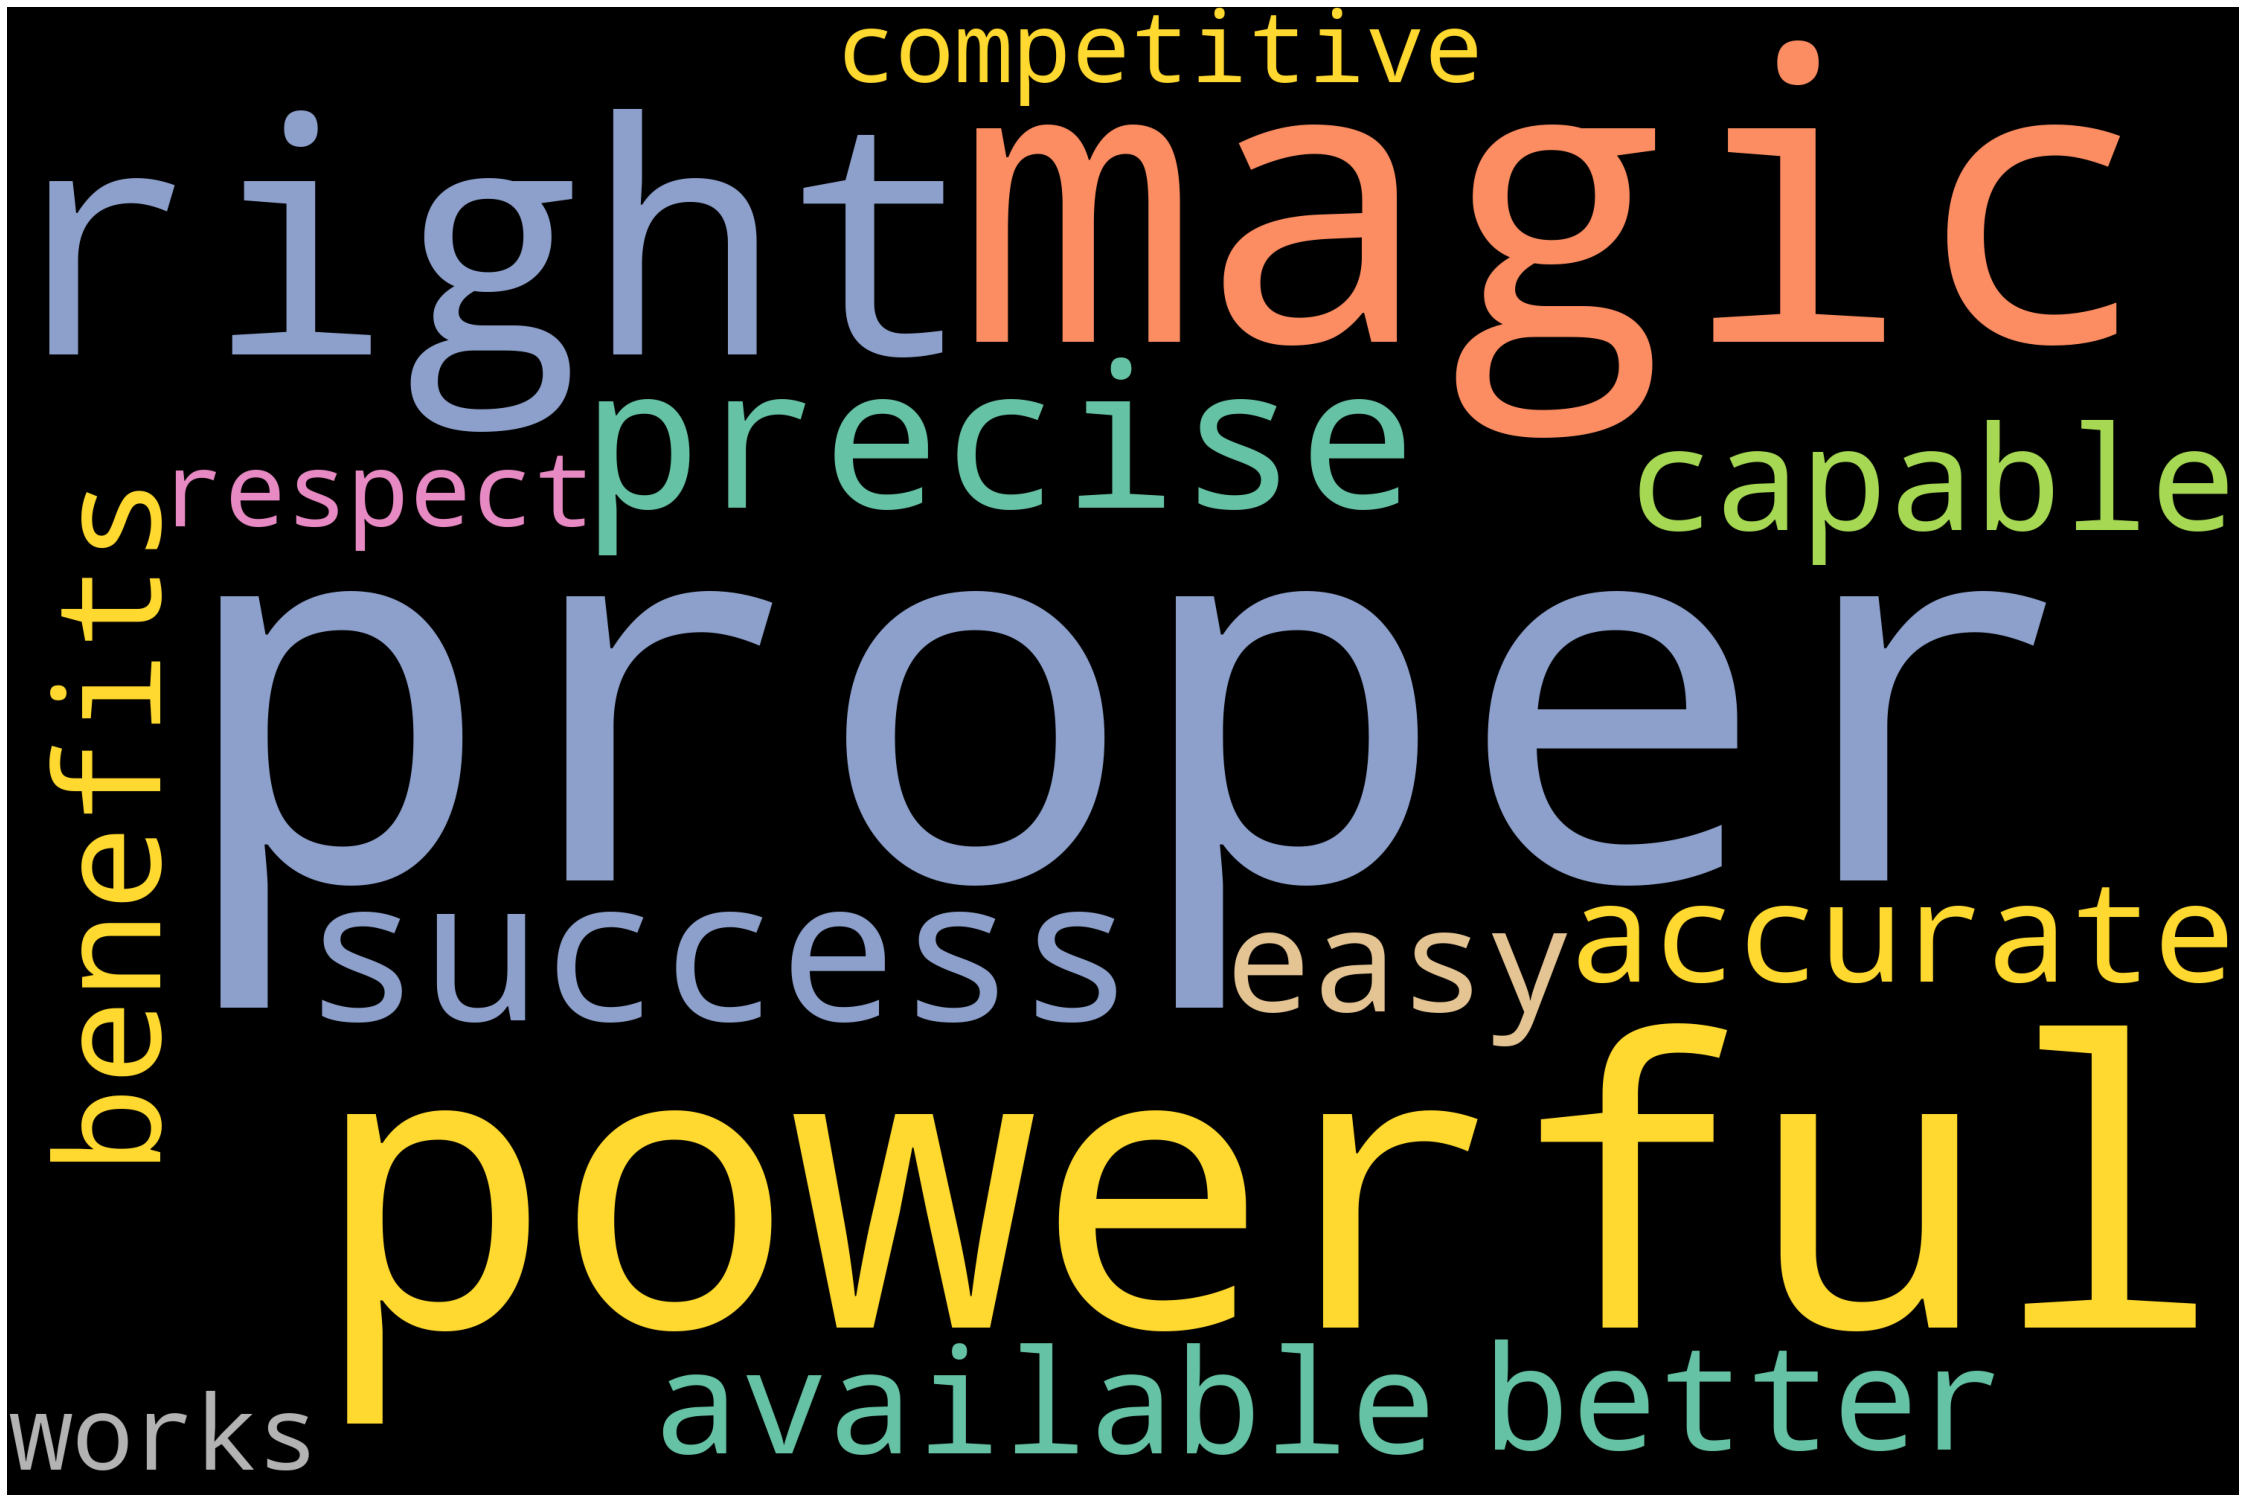

In [55]:
# Choosing the only words which are present in posword
pos_review = " ".join ([w for w in pos_count if w in poswords])
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(pos_review)
#Plot
plot_cloud(wordcloud)

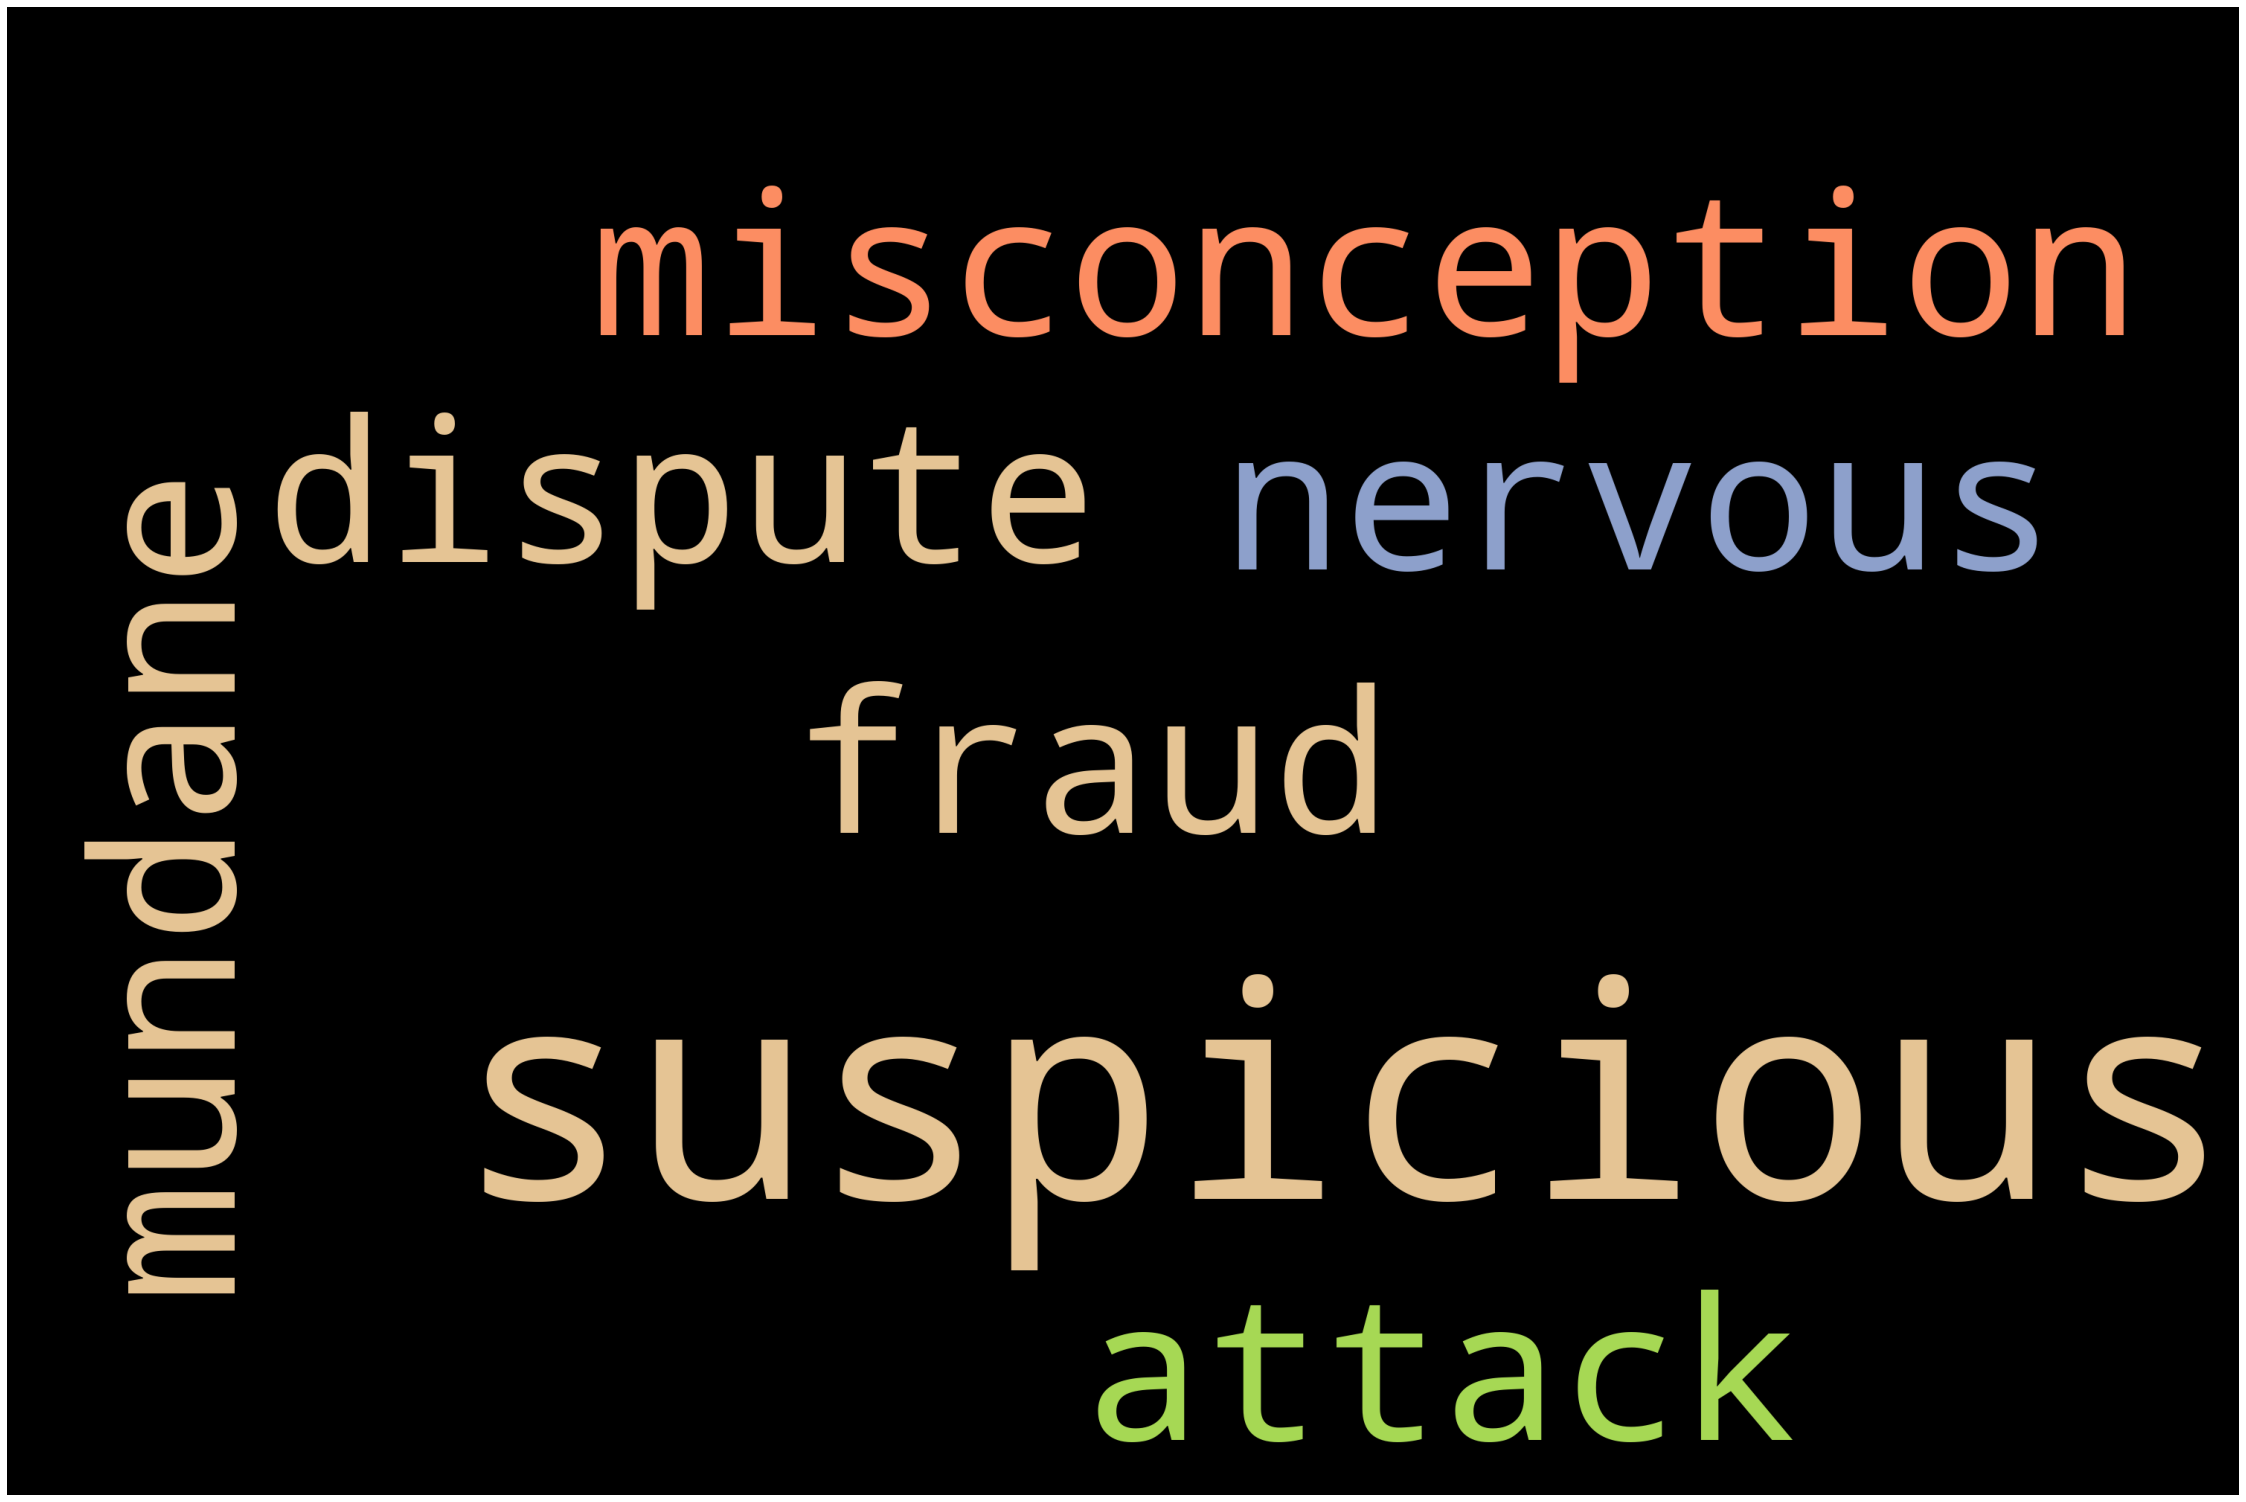

In [56]:
# Choosing the only words which are present in negwords
neg_review = " ".join ([w for w in neg_count if w in negwords])

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(neg_review)
#Plot
plot_cloud(wordcloud)

In [63]:
data={'positive_score':Positive_score,'negative_score':Negative_score,'avg_senetence_length':AVG_SENTENCE_LENGTH,'Percentage_of_Complex_words':pcw,'Fog_Index':Fog_Index,'avg_no_of_words_per_sentence':AVG_NUMBER_OF_WORDS_PER_SENTENCE,'complex_Word_Count':COMPLEX_WORDS,'word_count':Word_Count,'syllable_count':syllable_count,'personal_pronouns':Personal_Pronouns,'avg_word_length':Average_Word_Length}

In [65]:
output=pd.DataFrame()
output=output.append(data,ignore_index=True)
#output.columns=['positive_score','negative_score','Polarity_Score','subjectiivity_score','avg_senetence_length','Percentage_of_Complex_words','Fog_Index','avg_no_of_words_per_sentence','complex_Word_Count','word_count','syllable_count','personal_pronouns','avg_word_length']
output

,positive_score,negative_score,avg_senetence_length,Percentage_of_Complex_words,Fog_Index,avg_no_of_words_per_sentence,complex_Word_Count,word_count,syllable_count,personal_pronouns,avg_word_length
0,16.0,9.0,3673.0,29.160967,1980.8,NaN,1279.0,4386.0,1502.0,12.0,5.158708


In [72]:
with open('/content/drive/MyDrive/NLP Case Study/Output Data Structure.xlsx', 'a') as f:#creating text file 
     output.to_csv(f, index=False, header=False) 